## Matplotlibで作成したsvgファイルをemfファイルに変換

WordファイルをPDF変換したり、大きなスクリーンでプレゼンを行う場合には、拡大縮小に強いベクタ形式の画像が適している。  
Microsoft Officeのソフトに挿入可能なベクタ形式はemfファイルであり、  
他のepsやsvgファイルは非対応なので挿入するには少し手間がかかる。  

In [1]:
# Inkscapeのインストール（ubuntu）
# (sudo権限でパスワードが必要なためコンソールからインストール推奨)

! sudo apt-get install inkscape

[sudo] dnn20 のパスワード: 


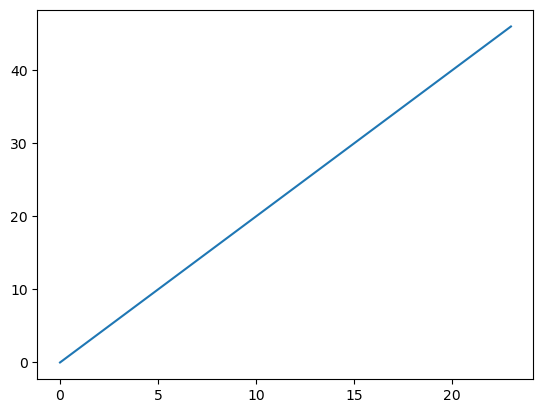

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path
import shutil

x = np.linspace(0,23,24)
y = np.linspace(0,46,24)
plt.plot(x,y)

output_image_name = 'sample_image'

if Path("./output").exists():
    shutil.rmtree("./output")
Path("./output").mkdir(parents=True)

plt.savefig(f'./output/{output_image_name}.svg')
subprocess.call(f'inkscape ./output/{output_image_name}.svg --export-filename=./output/{output_image_name}.emf', shell=True)
plt.show()

### 関数化

<module 'matplotlib.pyplot' from '/home/dnn20/anaconda3/envs/ymc/lib/python3.10/site-packages/matplotlib/pyplot.py'>

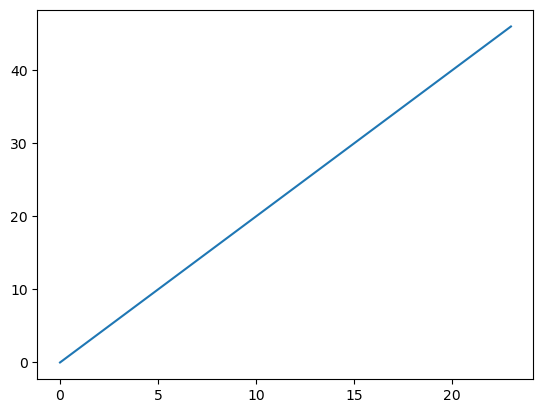

In [6]:
import subprocess
from pathlib import Path
import shutil

def save_plot_as_svg_and_emf(fig, output_image_name, output_dir="./output", exists_ok=False):
    """
    Saves a matplotlib figure as both SVG and EMF formats.

    Args:
    fig (matplotlib.figure.Figure): The figure to save.
    output_path (str): The directory where the figure will be saved.
    output_image_name (str): The base name of the output files.
    exists_ok (bool): If False, an existing output directory will be deleted.

    Returns:
    matplotlib.figure.Figure: The input figure.
    """

    svg_filename = Path(output_dir) / 'svg_image' / f'{output_image_name}.svg'
    emf_filename = Path(output_dir) / 'emf_image' / f'{output_image_name}.emf'

    # Create or clean the output directory
    if svg_filename.parent.exists() and not exists_ok:
        shutil.rmtree(svg_filename.parent)
    svg_filename.parent.mkdir(parents=True, exist_ok=True)
    if emf_filename.parent.exists() and not exists_ok:
        shutil.rmtree(emf_filename.parent)
    emf_filename.parent.mkdir(parents=True, exist_ok=True)

    # Save the figure as SVG
    fig.savefig(svg_filename)

    # Convert SVG to EMF using Inkscape
    subprocess.call(f'inkscape {svg_filename} --export-filename={emf_filename}', shell=True)

    return fig

x = np.linspace(0,23,24)
y = np.linspace(0,46,24)
plt.plot(x,y)

output_image_name = 'sample_image'
output_dir = './output'

save_plot_as_svg_and_emf(plt, output_image_name, output_dir)